<a href="https://colab.research.google.com/github/SILVIAIRENE/Data-Scientist-Machine-Learning-Engineer-Introductory-Course/blob/master/Clasificaci%C3%B3n_binaria_del_iris_(Iris_x_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos seleccionados (versicolor vs virginica):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    species  
50        1  
51        1  
52        1  
53        1  
54        1  


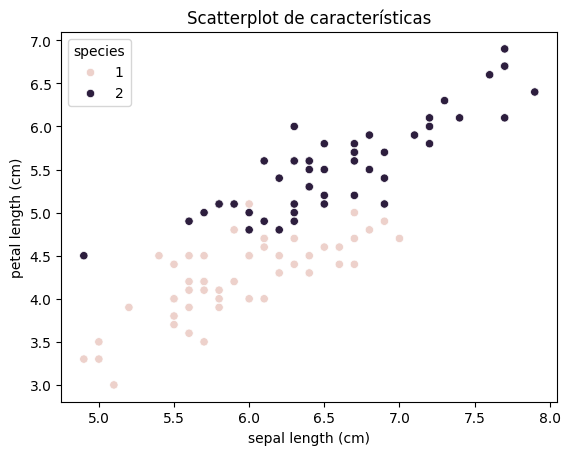

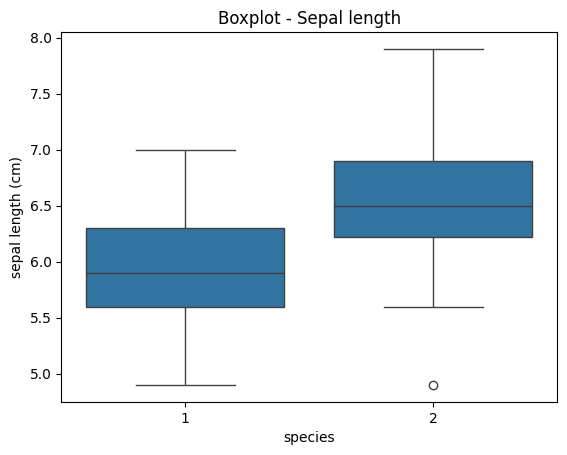

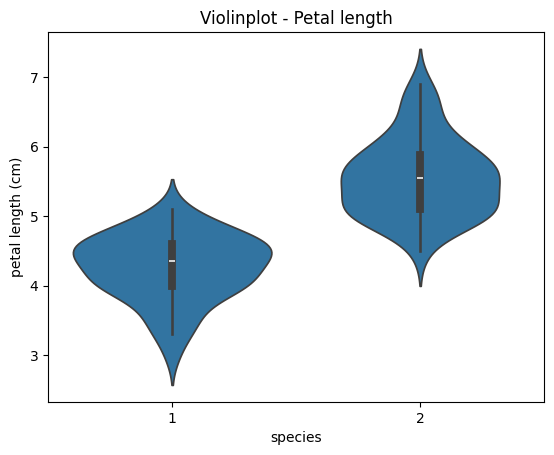


KNN - Reporte de Evaluación
{'Modelo': 'KNN', 'Accuracy': 0.8, 'Precision': 0.8166666666666667, 'Recall': 0.8044871794871795, 'F1 Score': 0.7987117552334944}


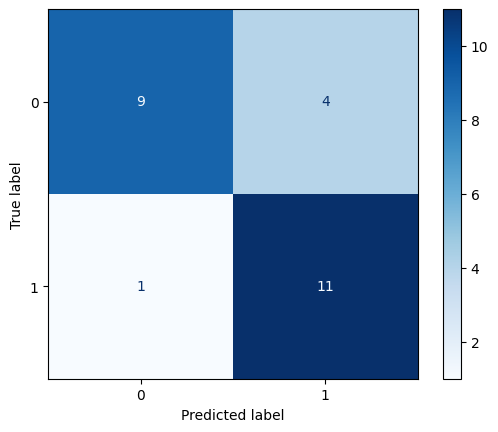

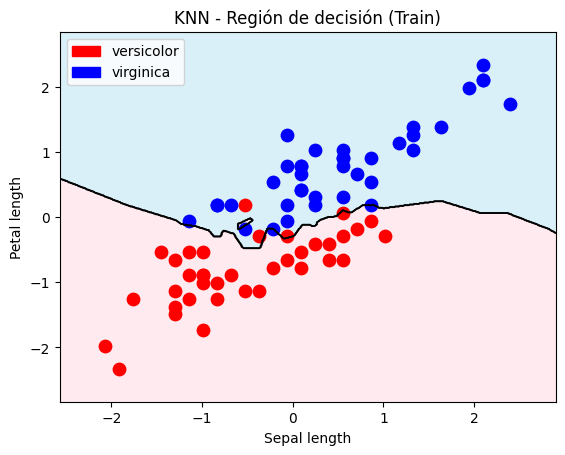


Logistic Regression - Reporte de Evaluación
{'Modelo': 'Logistic Regression', 'Accuracy': 0.92, 'Precision': 0.9198717948717949, 'Recall': 0.9198717948717949, 'F1 Score': 0.9198717948717949}


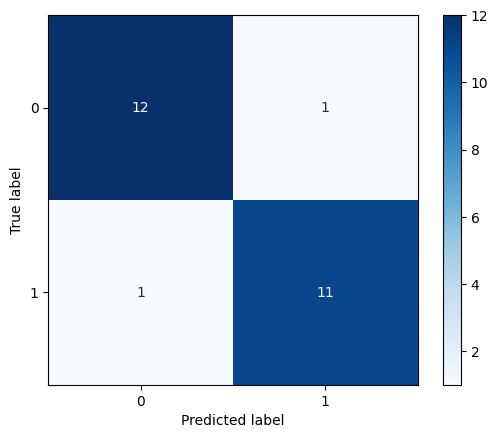

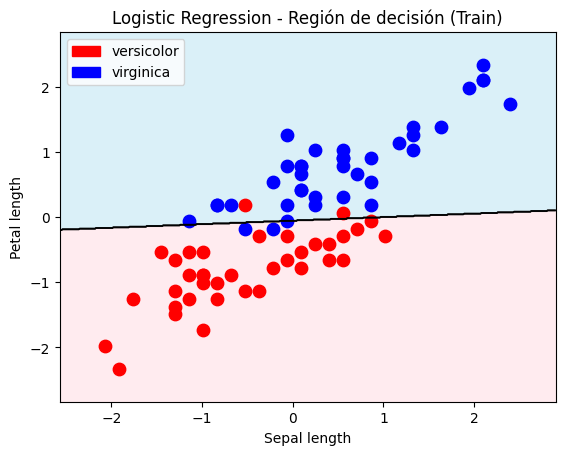


SVM - Reporte de Evaluación
{'Modelo': 'SVM', 'Accuracy': 0.88, 'Precision': 0.8814102564102564, 'Recall': 0.8814102564102564, 'F1 Score': 0.88}


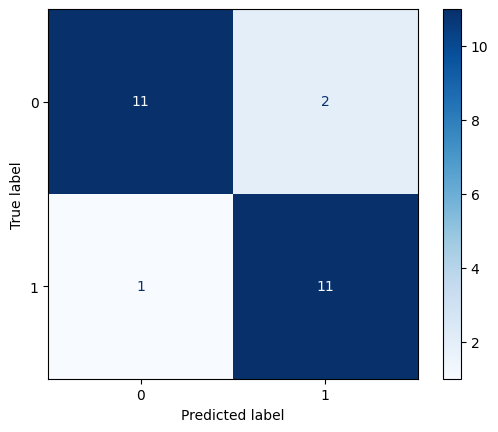

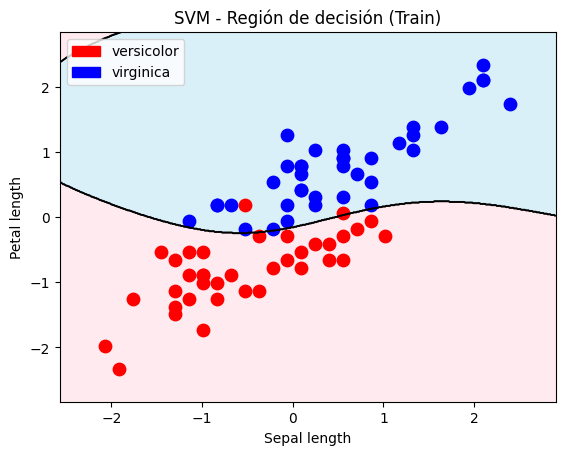


Decision Tree - Reporte de Evaluación
{'Modelo': 'Decision Tree', 'Accuracy': 0.84, 'Precision': 0.8397435897435898, 'Recall': 0.8397435897435898, 'F1 Score': 0.8397435897435898}


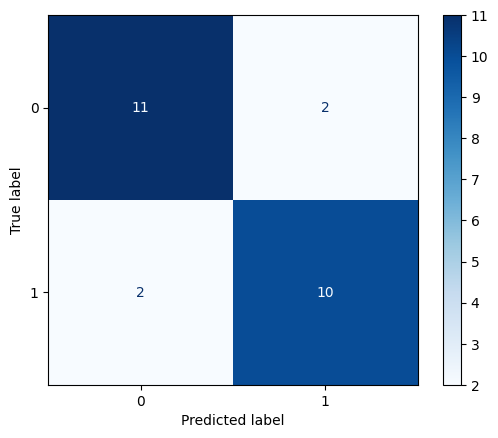

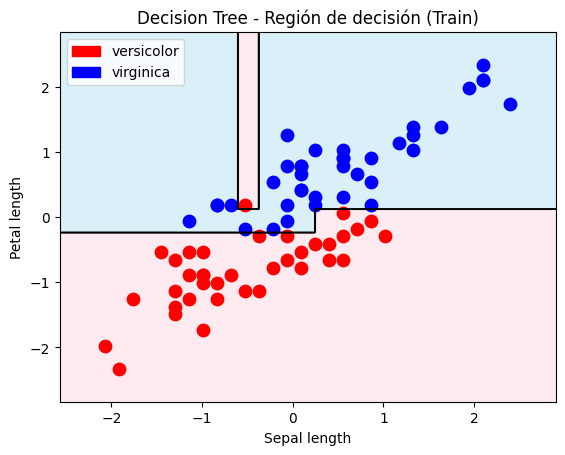


Random Forest - Reporte de Evaluación
{'Modelo': 'Random Forest', 'Accuracy': 0.88, 'Precision': 0.8814102564102564, 'Recall': 0.8814102564102564, 'F1 Score': 0.88}


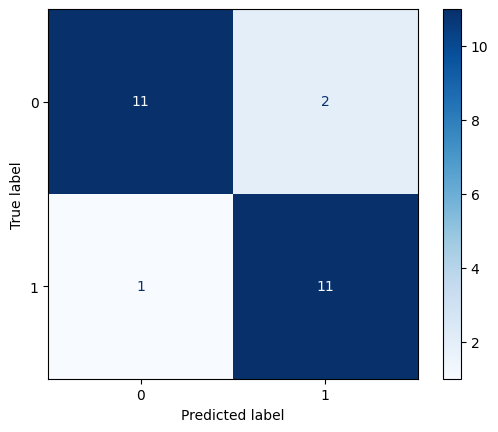

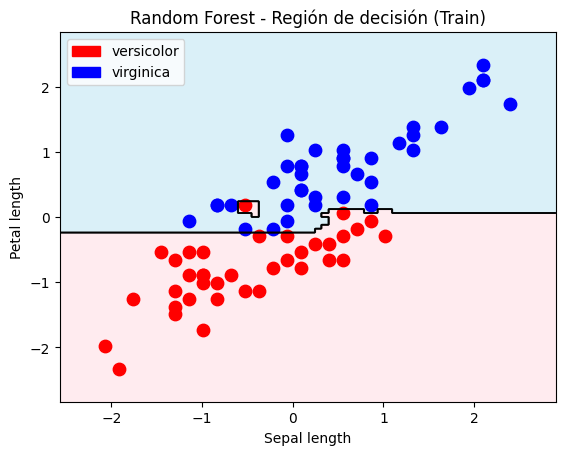


=== Tabla comparativa de modelos ===
                Modelo  Accuracy  Precision    Recall  F1 Score
0                  KNN      0.80   0.816667  0.804487  0.798712
1  Logistic Regression      0.92   0.919872  0.919872  0.919872
2                  SVM      0.88   0.881410  0.881410  0.880000
3        Decision Tree      0.84   0.839744  0.839744  0.839744
4        Random Forest      0.88   0.881410  0.881410  0.880000

Comparación sin estandarización:

KNN - Reporte de Evaluación
{'Modelo': 'KNN', 'Accuracy': 0.84, 'Precision': 0.8474025974025974, 'Recall': 0.842948717948718, 'F1 Score': 0.8397435897435898}


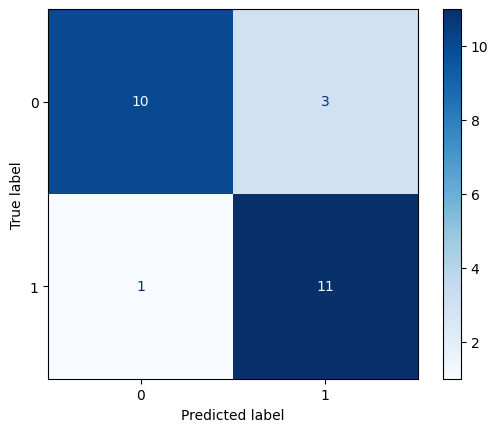


Logistic Regression - Reporte de Evaluación
{'Modelo': 'Logistic Regression', 'Accuracy': 0.96, 'Precision': 0.9642857142857143, 'Recall': 0.9583333333333333, 'F1 Score': 0.9597423510466989}


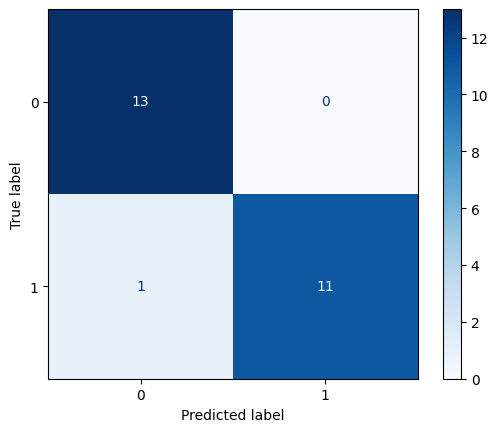


SVM - Reporte de Evaluación
{'Modelo': 'SVM', 'Accuracy': 0.88, 'Precision': 0.8814102564102564, 'Recall': 0.8814102564102564, 'F1 Score': 0.88}


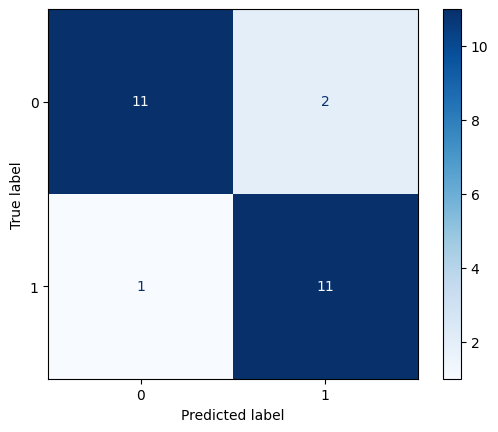


Decision Tree - Reporte de Evaluación
{'Modelo': 'Decision Tree', 'Accuracy': 0.84, 'Precision': 0.8397435897435898, 'Recall': 0.8397435897435898, 'F1 Score': 0.8397435897435898}


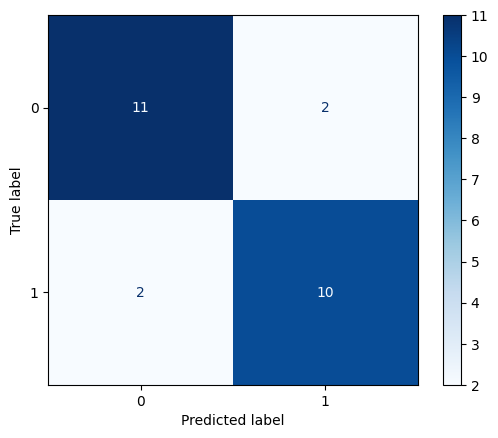


Random Forest - Reporte de Evaluación
{'Modelo': 'Random Forest', 'Accuracy': 0.88, 'Precision': 0.8814102564102564, 'Recall': 0.8814102564102564, 'F1 Score': 0.88}


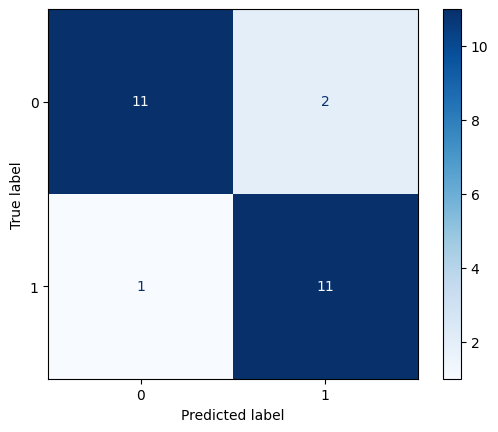

                Modelo  Accuracy  Precision    Recall  F1 Score
0                  KNN      0.84   0.847403  0.842949  0.839744
1  Logistic Regression      0.96   0.964286  0.958333  0.959742
2                  SVM      0.88   0.881410  0.881410  0.880000
3        Decision Tree      0.84   0.839744  0.839744  0.839744
4        Random Forest      0.88   0.881410  0.881410  0.880000

Random Forest Multiclase - Reporte de Evaluación
{'Modelo': 'Random Forest Multiclase', 'Accuracy': 0.9210526315789473, 'Precision': 0.9246031746031745, 'Recall': 0.923076923076923, 'F1 Score': 0.9229629629629629}


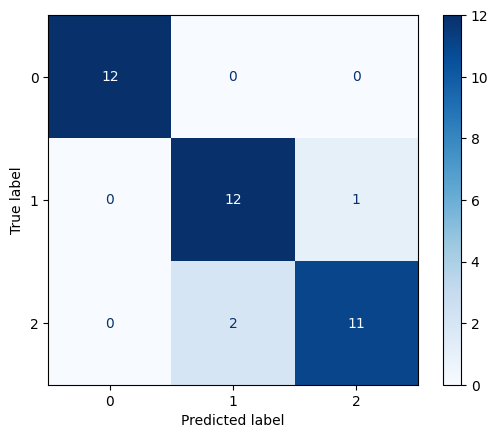

{'Modelo': 'Random Forest Multiclase',
 'Accuracy': 0.9210526315789473,
 'Precision': 0.9246031746031745,
 'Recall': 0.923076923076923,
 'F1 Score': 0.9229629629629629}

In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)


def decision_region(X, y, model, step=0.01, title="Decision Region",
                    xlabel="Feature 1", ylabel="Feature 2", target_names=None):
    scatter_color = ["red", "blue", "green"]
    contourf_color = ["pink", "skyblue", "lightgreen"]

    n_class = len(np.unique(y))

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, alpha=0.3, cmap=ListedColormap(contourf_color[:n_class]))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors="k", linewidths=1, alpha=0.5)

    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1],
                    s=80, color=scatter_color[i], label=target_names[i] if target_names else target)

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i] if target_names else i) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

def evaluate_model(model, X_train, y_train, X_test, y_test, name="Modelo"):
    y_pred = model.predict(X_test)
    metrics = {
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1 Score": f1_score(y_test, y_pred, average="macro")
    }
    print(f"\n{name} - Reporte de Evaluación")
    print(metrics)
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
    plt.show()
    return metrics

# [Problema 1] - Cargar dataset y seleccionar características

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

# Usamos solo dos clases y dos características
df_binary = df[df["species"].isin([1, 2])]  # versicolor y virginica
X = df_binary[["sepal length (cm)", "petal length (cm)"]].values
y = df_binary["species"].values

print("Datos seleccionados (versicolor vs virginica):")
print(df_binary.head())

# [Problema 2] - Análisis exploratorio

sns.scatterplot(data=df_binary, x="sepal length (cm)", y="petal length (cm)", hue="species")
plt.title("Scatterplot de características")
plt.show()

sns.boxplot(data=df_binary, x="species", y="sepal length (cm)")
plt.title("Boxplot - Sepal length")
plt.show()

sns.violinplot(data=df_binary, x="species", y="petal length (cm)")
plt.title("Violinplot - Petal length")
plt.show()


# [Problema 3] División train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# [Problema 4] Normalización

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# [Problema 5,6,7] Entrenamiento con KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
metrics_knn = evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test, "KNN")
decision_region(X_train_scaled, y_train, knn, title="KNN - Región de decisión (Train)",
                xlabel="Sepal length", ylabel="Petal length", target_names=["versicolor", "virginica"])


# [Problema 8] Comparación de otros métodos

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = [metrics_knn]

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    results.append(evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, name))
    decision_region(X_train_scaled, y_train, model, title=f"{name} - Región de decisión (Train)",
                    xlabel="Sepal length", ylabel="Petal length", target_names=["versicolor", "virginica"])

# Mostrar tabla resumen
results_df = pd.DataFrame(results)
print("\n=== Tabla comparativa de modelos ===")
print(results_df)

# [Problema 9] Sin estandarización

print("\nComparación sin estandarización:")
results_no_scaling = []
for name, model in [("KNN", KNeighborsClassifier()), ("Logistic Regression", LogisticRegression()),
                    ("SVM", SVC()), ("Decision Tree", DecisionTreeClassifier()), ("Random Forest", RandomForestClassifier())]:
    model.fit(X_train, y_train)
    results_no_scaling.append(evaluate_model(model, X_train, y_train, X_test, y_test, name))
results_no_scaling_df = pd.DataFrame(results_no_scaling)
print(results_no_scaling_df)


# [Problema 10] Clasificación multiclase con todas las especies

X_all = df.drop("species", axis=1).values
y_all = df["species"].values
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.25, random_state=42, stratify=y_all)
scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

multi_model = RandomForestClassifier()
multi_model.fit(X_train_all_scaled, y_train_all)
evaluate_model(multi_model, X_train_all_scaled, y_train_all, X_test_all_scaled, y_test_all, "Random Forest Multiclase")
